In [18]:
import numpy as np
import pandas as pd                


In [19]:
df=pd.DataFrame()

In [20]:
df['X1']=[8,4,3,4,9,6,7,8,9,3]
df['X2']=[1,6,4,2,3,7,1,9,5,2]
df['label']=[1,0,0,1,0,1,1,0,1,0]

In [21]:
df

,X1,X2,label
0,8,1,1
1,4,6,0
2,3,4,0
3,4,2,1
4,9,3,0
5,6,7,1
6,7,1,1
7,8,9,0
8,9,5,1
9,3,2,0


In [22]:
df['weights']=1/len(df)

In [23]:
df

,X1,X2,label,weights
0,8,1,1,0.1
1,4,6,0,0.1
2,3,4,0,0.1
3,4,2,1,0.1
4,9,3,0,0.1
5,6,7,1,0.1
6,7,1,1,0.1
7,8,9,0,0.1
8,9,5,1,0.1
9,3,2,0,0.1


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt1=DecisionTreeClassifier(max_depth=1)

In [26]:
X=df.iloc[:,:2].values
y=df.iloc[:,2].values


In [27]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 1.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

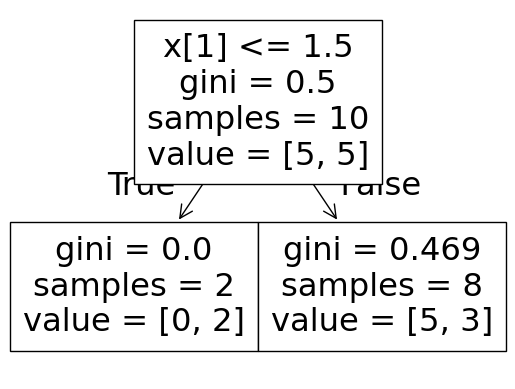

In [28]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

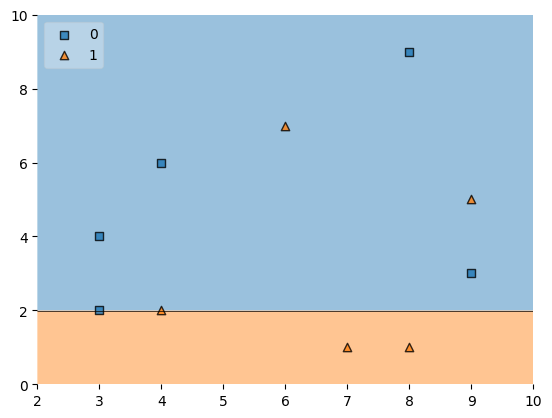

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=dt1, legend=2)

In [30]:
df['y_pred']=dt1.predict(X)

In [31]:
df

,X1,X2,label,weights,y_pred
0,8,1,1,0.1,1
1,4,6,0,0.1,0
2,3,4,0,0.1,0
3,4,2,1,0.1,0
4,9,3,0,0.1,0
5,6,7,1,0.1,0
6,7,1,1,0.1,1
7,8,9,0,0.1,0
8,9,5,1,0.1,0
9,3,2,0,0.1,0


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(df['label'],df['y_pred'])

0.7

In [34]:
def calculate_model_weights(error):
    return 0.5 * np.log((1 - error) / (error))

In [36]:
alpha1=calculate_model_weights(0.3) 
alpha1

np.float64(0.42364893019360184)